In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('../')

__About__


Data from multiple programmes and projects who used the ELOM tools were collated, spanning from 2019-2022. You can view the different data sources and collection methods
 in a PDF in the download section.

There are 8 665 children in the train and 3 600 in test.

In this competition, we aim to use machine learning techniques to identify factors of early learning programmes that contribute to better learning outcomes in children.
While predicting the child’s ELOM score and the top 15 predictors for each child.

The final merged dataset consisted of 12 265 children across 2 217 facilities. Table X below provides a summary of the data included in the meta-dataset.
The first column indicates the data source, and the remainder of the columns show the different types of tools or data collected and the number of children we have data for
 across these sets of variables. An “X” indicates that the data was not collected at all.

The Thrive by Five Index (2021) found that less than half of children attending an early learning programme (such as a preschool or creche) in South Africa start school
 with the right early learning foundation. There are many factors that influence whether a child Thrives by Five, such as access to a quality early learning programme,
 as well as poverty, gender, malnutrition, and emotional well-being. Children without a good foundation struggle to keep up at school and have a major learning disadvantage.

The Index used the Early Learning Outcomes Measure (ELOM) to assess children, and categorises their development as either “on track”, “falling behind” or “falling far behind”.

In this competition, your challenge is to use machine learning techniques to identify which early learning programme factors contribute to better learning outcomes in
children, by predicting a child’s ELOM score.

This will allow DataDrive2030 to design better interventions that make optimal use of limited resources to ensure South Africa’s children are thriving.

About DataDrive2030 (datadrive2030.co.za)


Established in March 2022, DataDrive2030 is a South African based social enterprise that supports the collection and use of high quality data to drive improved
child outcomes in the first 6 years of life. Our suite of early learning measurement tools accurately measure a range of developmental outcomes in young children, and provide an indication of the quality of the early 
learning environment in home and programme settings. Tools are digitised and designed for affordable use at scale in all official South African languages, with built-in data quality assurance mechanisms.

We aim to make these tools widely accessible, and to ensure that the information that is generated is easily understandable and most importantly, is actionable. 
Using data, our goal is to drive tangible improvements in early childhood development services in South Africa, by 2030.

In [3]:
pwd

'c:\\Users\\Ayo Agbaje\\Documents\\Code\\Python\\GIGS\\PYTHON_docs\\py_files\\Competitions\\Zindi Competitions\\Data-Drive-Early-Learning-Predictors-Challenge'

In [4]:
train_ = pd.read_csv('data/Train.csv', low_memory=False)
test_ = pd.read_csv('data/Test.csv', low_memory=False)
samp_sub_ = pd.read_csv('data/SampleSubmission.csv')
var_desc_ = pd.read_csv('data/VariableDescription.csv')

In [5]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8585 entries, 0 to 8584
Columns: 679 entries, child_id to target
dtypes: float64(160), object(519)
memory usage: 44.5+ MB


In [6]:
train_.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [7]:
samp_sub_.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
1,ID_GQ6ONJ4FP,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
2,ID_YZ76CVRW3,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
3,ID_BNINCRXH8,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
4,ID_1U7GDTLRI,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature


In [8]:
'feature_1' in train_.columns

False

In [9]:
pd.options.display.max_colwidth = 2000
pd.options.display.max_rows = 500

In [10]:
null_ = pd.DataFrame(data = train_.isnull().sum(), columns = ['Null Count'])
null_ = null_[null_['Null Count'] > 3000]
# null_

cols_to_drop = []
for i in null_.index:
    cols_to_drop.append(i)

In [11]:
len(cols_to_drop)

624

In [12]:
# train_ = train_.drop(cols_to_drop, axis = 1)
# test_ = test_.drop(cols_to_drop, axis = 1)

In [13]:
null_ = pd.DataFrame(data = train_.isnull().sum(), columns = ['Null Count'])
null_[null_['Null Count'] > 20]

,Null Count
child_date,1821
child_enrolment_date,5964
child_months_enrolment,5964
child_grant,3133
child_years_in_programme,706
...,...
obs_heating_3,6324
obs_heating_4,6324
obs_heating_5,6324
obs_heating_6,6324


In [14]:
cols_ = ['child_id', 'data_year', 'child_age', 'child_observe_attentive',
       'child_observe_concentrated', 'child_observe_diligent',
       'child_observe_interested', 'child_gender', 'child_age_group',
       'prov_best', 'id_facility', 'hle_ind', 'language_assessment', 'sef_ind',
       'pre_covid', 'child_years_in_programme', 'child_stunted', 'language_child', 'language_match', 'urban', 'target']

In [15]:
train_ = train_[cols_]
test_ = test_[cols_[:-1]]

In [16]:
train_.shape

(8585, 21)

In [17]:
test_.shape

(3680, 20)

In [18]:
train_.isnull().sum()

child_id                         0
data_year                        0
child_age                        0
child_observe_attentive          0
child_observe_concentrated       0
child_observe_diligent           0
child_observe_interested         0
child_gender                     0
child_age_group                  0
prov_best                        0
id_facility                     12
hle_ind                          0
language_assessment              0
sef_ind                          0
pre_covid                        0
child_years_in_programme       706
child_stunted                 1662
language_child                1543
language_match                  62
urban                         3760
target                           0
dtype: int64

In [19]:
train_['id_facility'] = train_['id_facility'].fillna(value = 1613.0)
train_['child_years_in_programme'] = train_['child_years_in_programme'].fillna(value = '1st year in the programme')
train_['child_stunted'] = train_['child_stunted'].fillna(value = 'Normal')
train_['language_child'] = train_['language_child'].fillna(value = 'isiZulu')

test_['id_facility'] = test_['id_facility'].fillna(value = 1613.0)
test_['child_years_in_programme'] = test_['child_years_in_programme'].fillna(value = '1st year in the programme')
test_['child_stunted'] = test_['child_stunted'].fillna(value = 'Normal')
test_['language_child'] = test_['language_child'].fillna(value = 'isiZulu')


In [20]:
train_ = train_.drop('urban', axis = 1)
test_ = test_.drop('urban', axis = 1)
# # train_.head()

In [29]:
train_.isnull().sum()

child_id                      0
data_year                     0
child_age                     0
child_observe_attentive       0
child_observe_concentrated    0
child_observe_diligent        0
child_observe_interested      0
child_gender                  0
child_age_group               0
prov_best                     0
id_facility                   0
hle_ind                       0
language_assessment           0
sef_ind                       0
pre_covid                     0
child_years_in_programme      0
child_stunted                 0
language_child                0
language_match                0
target                        0
dtype: int64

In [28]:
test_.isnull().sum()

child_id                       0
data_year                      0
child_age                      0
child_observe_attentive        0
child_observe_concentrated     0
child_observe_diligent         0
child_observe_interested       0
child_gender                   0
child_age_group                0
prov_best                      0
id_facility                    0
hle_ind                        0
language_assessment            0
sef_ind                        0
pre_covid                      0
child_years_in_programme       0
child_stunted                  0
language_child                 0
language_match                20
dtype: int64

In [23]:
train_.shape

(8585, 20)

In [24]:
train_.head()

,child_id,data_year,child_age,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_gender,child_age_group,prov_best,id_facility,hle_ind,language_assessment,sef_ind,pre_covid,child_years_in_programme,child_stunted,language_child,language_match,target
0,ID_SYSJ2FM0D,2022.0,59.000000,Sometimes,Sometimes,Sometimes,Sometimes,Female,50-59 months,GAUTENG,761.0,No,Sesotho,Yes,Post COVID,1st year in the programme,Normal,Sesotho,1.0,51.500000
1,ID_J5BTFOZR3,2019.0,60.163933,Sometimes,Almost never,Sometimes,Often,Female,60-69 months,KWAZULU-NATAL,458.0,No,isiZulu,Yes,Pre-COVID,1st year in the programme,Normal,isiZulu,1.0,55.869999
2,ID_R00SN7AUD,2022.0,69.000000,Often,Often,Sometimes,Often,Male,60-69 months,WESTERN CAPE,925.0,No,Afrikaans,No,Post COVID,1st year in the programme,Normal,Afrikaans,1.0,47.520000
3,ID_BSSK60PAZ,2021.0,53.000000,Almost always,Almost always,Sometimes,Often,Male,50-59 months,WESTERN CAPE,308.0,No,isiXhosa,Yes,Post COVID,1st year in the programme,Normal,isiXhosa,1.0,58.599998
4,ID_IZTY6TC4D,2021.0,57.000000,Almost always,Almost always,Almost always,Almost always,Female,50-59 months,KWAZULU-NATAL,1749.0,No,isiZulu,Yes,Post COVID,2nd year in programme,Normal,isiZulu,1.0,76.599998


In [25]:
def language_match(func_):
    lang_assess = func_[0]
    lang_child = func_[1]
    lang_match = func_[2]

    if pd.isnull(lang_match):
        if lang_assess == lang_child:
            return 1
        else:
            return 0
    else:
        return lang_match

In [30]:
col_list_ = ['language_assessment', 'language_child', 'language_match']
train_['language_match'] = train_[col_list_].apply(language_match, axis = 1)
test_['language_match'] = test_[col_list_].apply(language_match, axis = 1)

In [33]:
# train_._get_numeric_data()

In [34]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='target', ylabel='Count'>

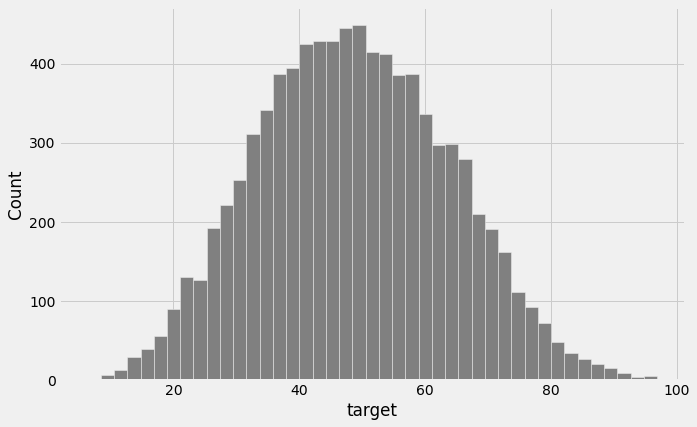

In [40]:
plt.figure(figsize=(10,6.4))
sns.histplot(data = train_, x = 'target', color = 'grey', alpha = 1)

In [58]:
def hue_hist(target_col, hue_order):
    plt.figure(figsize=(10,6.4))
    sns.histplot(data = train_, x = 'target', hue = target_col, alpha = .63, hue_order = hue_order)

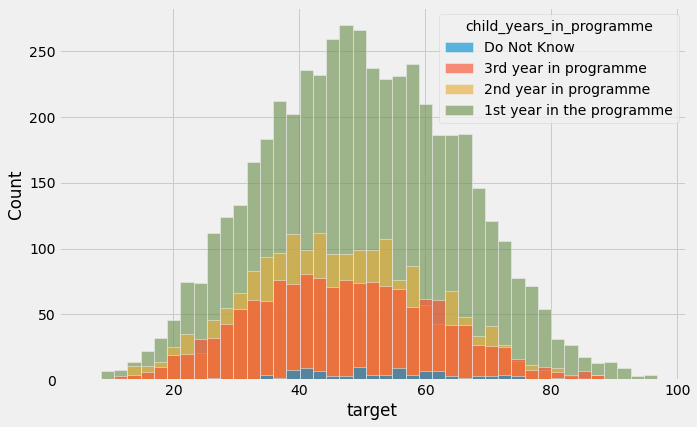

In [64]:
hue_hist(target_col = 'child_years_in_programme', hue_order = sorted(train_['child_years_in_programme'].unique(), reverse = True))

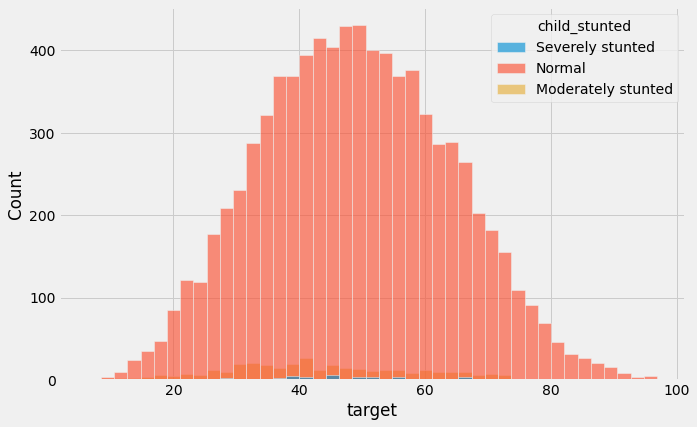

In [65]:
hue_hist(target_col = 'child_stunted', hue_order = sorted(train_['child_stunted'].unique(), reverse = True))

In [77]:
gender_group = train_.groupby('child_gender')
gender_group_mean = gender_group.mean()
gender_target = gender_group_mean[['target']]
gender_target.columns = ['Mean ELOM Score']
gender_target

,Mean ELOM Score
child_gender,
Female,49.927066
Male,47.371494


In [91]:
gender_count = pd.DataFrame(data = train_['child_gender'].value_counts())
gender_count.columns = ['Count']
gender_count

,Count
Female,4442
Male,4143


In [82]:
train_['child_gender'].value_counts()

Female    4442
Male      4143
Name: child_gender, dtype: int64

<AxesSubplot:xlabel='child_age', ylabel='Count'>

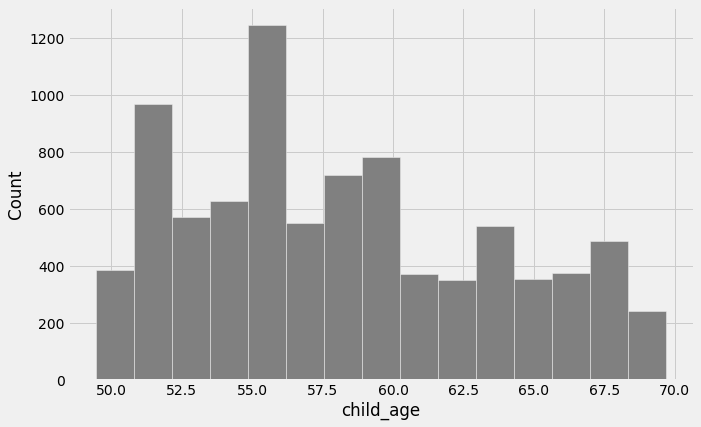

In [94]:
plt.figure(figsize=(10,6.4))
sns.histplot(data = train_, x = 'child_age', color = 'grey', alpha = 1, bins = 15)

In [95]:
train_['child_age'].mean()

58.11687336054329

<AxesSubplot:xlabel='child_age', ylabel='target'>

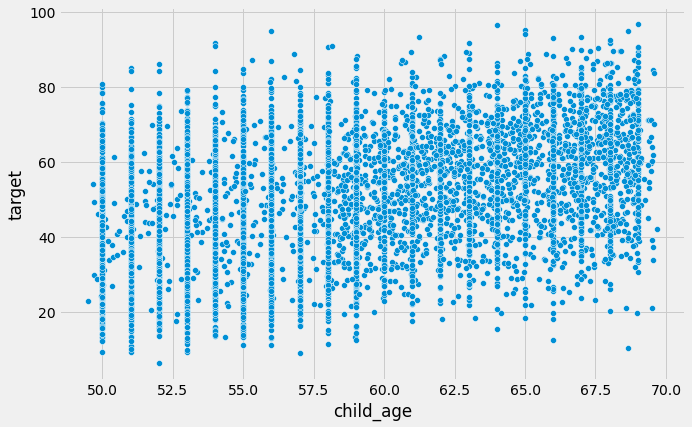

In [97]:
plt.figure(figsize=(10,6.4))
sns.scatterplot(x = 'child_age', y = 'target', data = train_)